<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Nunito+Sans&family=Quicksand&display=swap" rel="stylesheet">

<div display="flex" align="center" justify-content="center" width="100%">

<!-- <img height=80 src="https://drive.google.com/uc?id=13kMLUyF9yPOsfMB782I1wk-_pYNiyxkI"> </img> -->
</div>

<div style="font-family: 'Nunito Sans', sans-serif;">
    
# **Feature Selection and Elimination**
---
    
</div> 

<div  style="font-size: 22px; color:black; font-family: 'Quicksand', sans-serif;font-weight:500">

Author : Thivin Anandh D 


</div>


<div  style="font-size: 18px; color:black; font-family: 'Quicksand', sans-serif;font-weight:400">
<a href="https://www.linkedin.com/in/thivinanandh/" > Linkedin 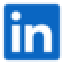</a>
<a href="https://github.com/thivinanandh" > Github 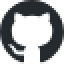</a>

For opening this notebook in google colab, please click on the button below.<br />
<br />
<a href="https://colab.research.google.com/github/thivinanandh/Teaching-Python/blob/main/ML-Algorithms/Feature-Selection-nd-Elimination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

</div>


# Feature Selection Techniques in Machine Learning
---

## Introduction

Feature selection is a crucial step in the machine learning pipeline, aimed at identifying the most relevant features in a dataset. This process not only improves model performance but also enhances interpretability, reduces overfitting, and decreases computational costs.

In this notebook, we will explore various feature selection techniques, focusing on their implementation and interpretation using Python. We'll cover three main categories of feature selection methods:

1. **Filter Methods**: These methods select features based on statistical measures, independent of any machine learning algorithm.
2. **Wrapper Methods**: These methods use a specific machine learning algorithm to evaluate subsets of features.
3. **Embedded Methods**: These methods perform feature selection as part of the model training process.

## What We'll Cover

1. **Data Preparation**
   - Loading and exploring a dataset with mixed feature types
   - Handling missing values and outliers

2. **Filter Methods**
   - Correlation analysis for numerical features
   - Chi-square test for categorical features
   - ANOVA for categorical vs numerical features

3. **Wrapper Methods**
   - Recursive Feature Elimination (RFE)
   - Forward and Backward Feature Selection

4. **Embedded Methods**
   - Lasso Regression
   - Ridge Regression
   - Elastic Net

5. **Tree-Based Feature Importance**
   - Random Forest
   - Gradient Boosting (XGBoost)

By the end of this notebook, you'll have a comprehensive understanding of various feature selection techniques and how to apply them in practice. You'll be equipped to make informed decisions about which features to include in your machine learning models, leading to more efficient and effective model development.

Let's dive in and start exploring the world of feature selection!

In [77]:
!python3 -m pip install pandas numpy scipy seaborn sklearn shap

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 459 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.6 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 4.7 MB/s eta 0:00:011
     |████████████████████████████████| 31.1 MB 8.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


###  Dataset
---

Dataset lik : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data


In [70]:
import pandas as pd
import numpy as np
from scipy.stats import truncnorm

# Set random seed for reproducibility
np.random.seed(42)

df = pd.read_csv("house_prices.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Understanding Feature Relationships and Selection Methods

In our dataset, we have both numerical and categorical features. Understanding the relationships between these features and our target variable (house price) is crucial for effective feature selection. Let's explore the different types of relationships and the statistical methods we'll use to analyze them.

## Types of Feature Relationships

1. **Numerical to Numerical (Num to Num)**
   - Example: Relationship between 'square_feet' and 'house_price'
   - Both the feature and the target variable are continuous numerical values

2. **Categorical to Numerical (Cat to Num)**
   - Example: Relationship between 'neighborhood' and 'house_price'
   - The feature is categorical (discrete categories), while the target is numerical

3. **Categorical to Categorical (Cat to Cat)**
   - Example: Relationship between 'neighborhood' and 'school_quality'
   - Both the feature and the target are categorical

## Statistical Methods for Feature Selection

For each type of relationship, we'll use a different statistical method to assess the strength of the relationship and select relevant features:

1. **Numerical to Numerical: Pearson Correlation**
   - Measures the linear correlation between two continuous variables
   - Range: -1 to 1, where -1 is perfect negative correlation, 0 is no correlation, and 1 is perfect positive correlation
   - We'll use this for relationships like 'square_feet' vs 'house_price'

2. **Categorical to Numerical: ANOVA (Analysis of Variance)**
   - Compares the means of a numerical variable across different categories
   - Helps determine if there are statistically significant differences between the means of groups
   - We'll use this for relationships like 'neighborhood' vs 'house_price'

3. **Categorical to Categorical: Chi-Square Test**
   - Determines if there is a significant relationship between two categorical variables
   - Tests whether the observed frequency distribution differs from the expected distribution
   - We'll use this for relationships like 'neighborhood' vs 'school_quality'

## Why These Methods?

- **Pearson Correlation** is ideal for num-to-num relationships as it quantifies the strength and direction of linear relationships between continuous variables.

- **ANOVA** is suitable for cat-to-num relationships as it can determine if different categories have significantly different means in the numerical variable.

- **Chi-Square Test** is appropriate for cat-to-cat relationships as it can reveal dependencies between categorical variables.

By applying these methods, we'll be able to identify which features have strong relationships with our target variable (house price) and with each other, guiding our feature selection process for building an effective predictive model.

# Pearson Correlation for Feature Selection

## What is Pearson Correlation?

Pearson correlation, also known as Pearson's r, is a measure of the linear correlation between two variables. It's widely used in statistics to measure the strength and direction of the relationship between two continuous variables.

## Mathematical Formula

The Pearson correlation coefficient (r) is calculated as:

$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}$

Where:
- $x_i$ and $y_i$ are individual sample points
- $\bar{x}$ and $\bar{y}$ are the sample means
- $n$ is the sample size

## Interpretation of Pearson's r

- The value of r ranges from -1 to +1
- r = 1 indicates a perfect positive linear relationship
- r = -1 indicates a perfect negative linear relationship
- r = 0 indicates no linear relationship

General guidelines for interpreting the strength of the relationship:
- |r| < 0.3: Weak correlation
- 0.3 ≤ |r| < 0.5: Moderate correlation
- 0.5 ≤ |r| < 0.7: Strong correlation
- |r| ≥ 0.7: Very strong correlation

## Using Pearson Correlation for Feature Selection

1. **Correlation between Input Features and Target Variable**
   - High correlation (positive or negative) between an input feature and the target variable is generally desirable.
   - It indicates that the feature has a strong linear relationship with the target and is likely to be useful in predicting it.
   - Example: If 'square_feet' has a correlation of 0.8 with 'house_price', it's likely to be a valuable predictor.

2. **Correlation among Input Features**
   - High correlation between input features (multicollinearity) is generally not preferred.
   - It can lead to instability in model coefficients and make interpretation difficult.
   - Example: If 'num_rooms' and 'total_rooms' have a correlation of 0.95, they provide redundant information, and one might be removed.

## Steps for Feature Selection using Pearson Correlation

1. Calculate the correlation matrix for all features, including the target variable.
2. Identify features with high correlation to the target variable (e.g., |r| > 0.5).
3. Among highly correlated features, check for multicollinearity:
   - If two features are highly correlated with each other (e.g., |r| > 0.7), consider removing one.
   - Keep the feature that has a higher correlation with the target variable.

4. Set a threshold (e.g., |r| > 0.3) and select features that meet this criteria in relation to the target variable.

## Advantages and Limitations

Advantages:
- Simple to compute and interpret
- Provides a clear measure of linear relationships

Limitations:
- Only captures linear relationships
- Sensitive to outliers
- Assumes variables are normally distributed

Pearson correlation is a powerful tool for initial feature selection, especially in linear models. It helps identify potentially important predictors and redundant features. However, it should be used in conjunction with other methods, as it may miss non-linear relationships and doesn't account for interactions between features.

Numerical columns in the dataset:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Correlations with SalePrice:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799

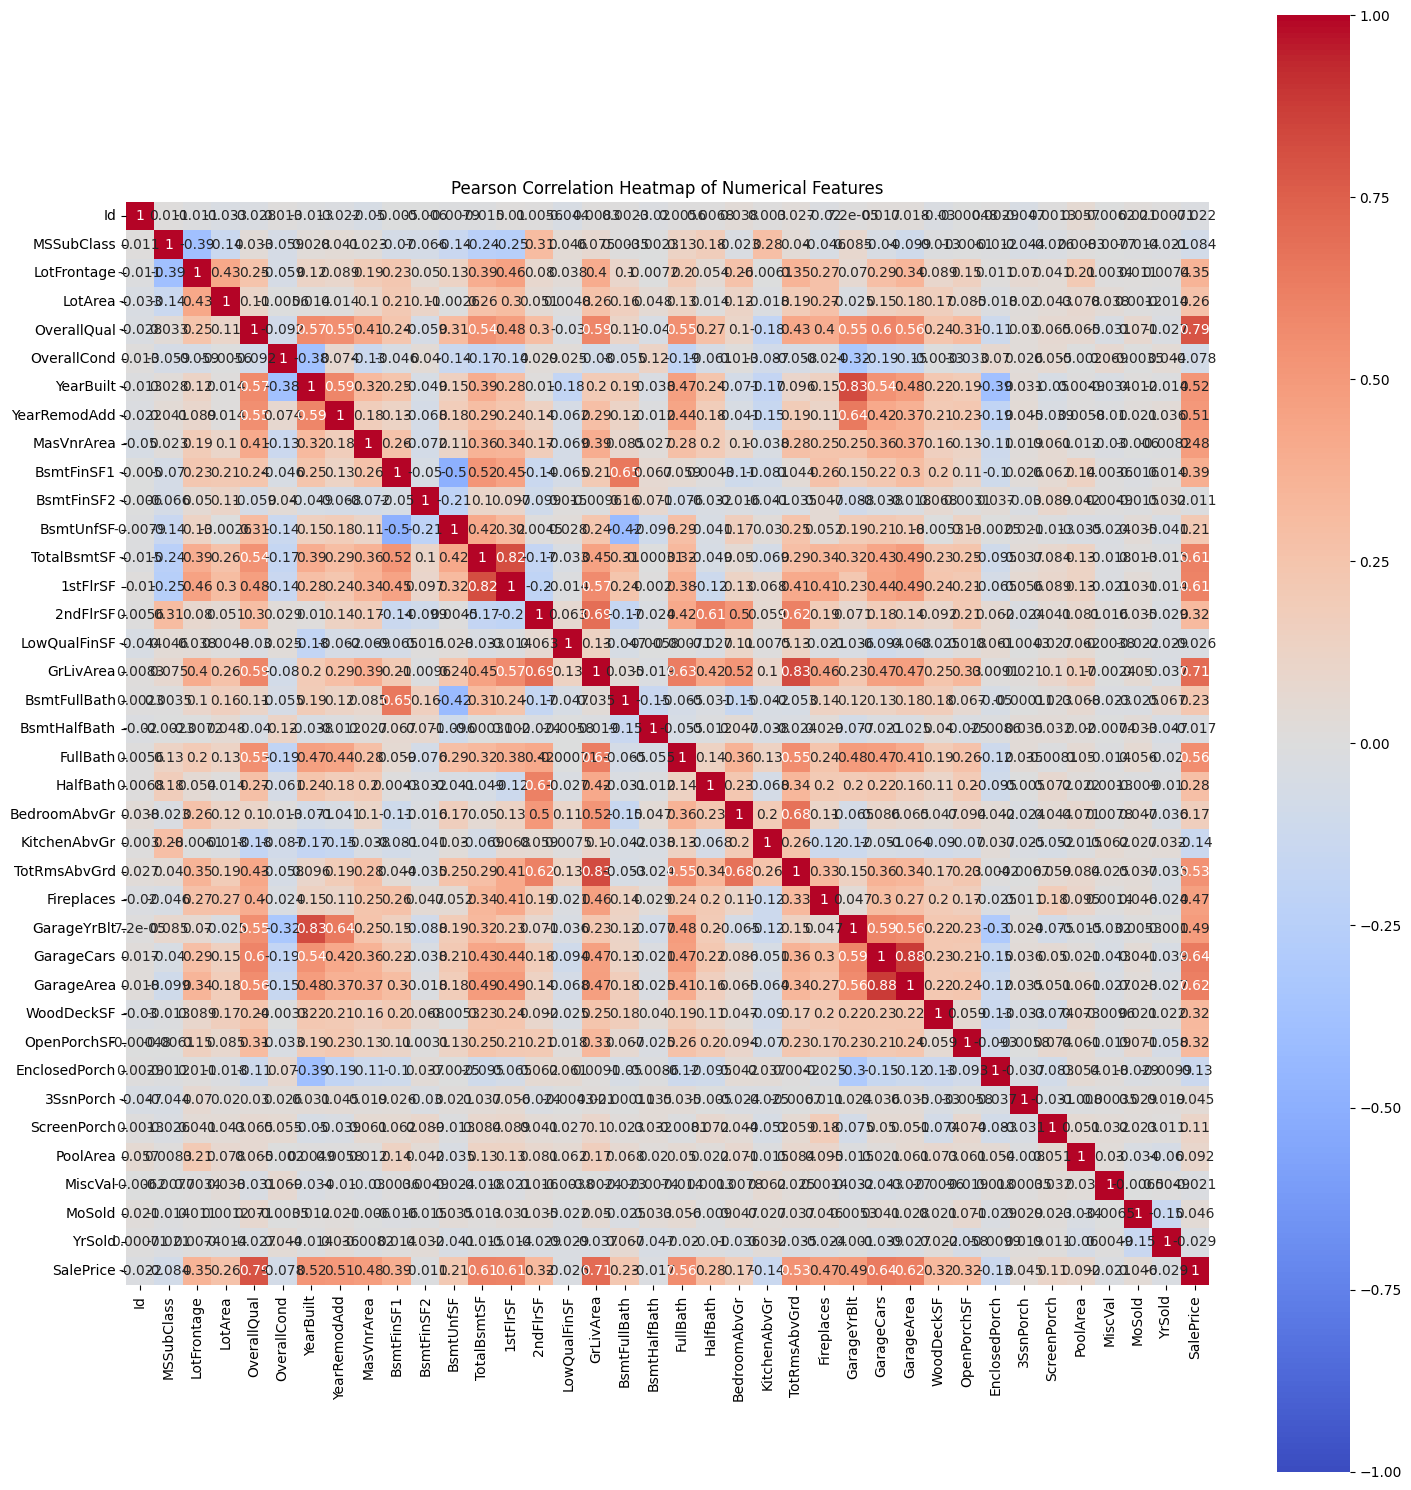

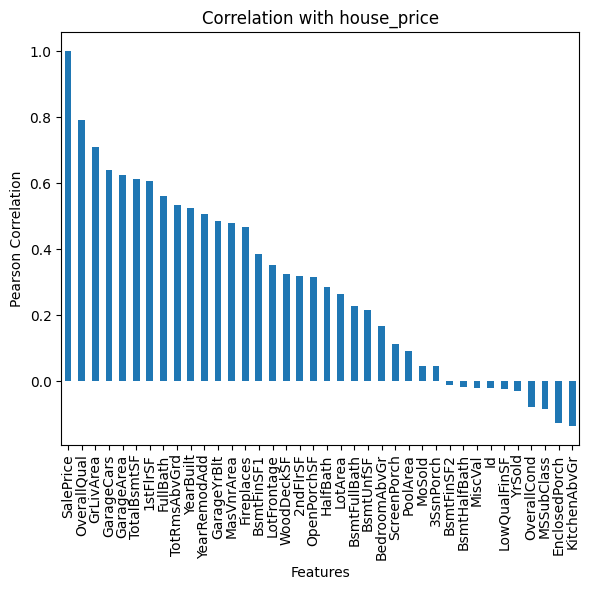

In [37]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating plots

# Assuming 'df' is our DataFrame containing the house price data

def perform_pearson_correlation(df):
    """
    Perform Pearson correlation analysis on numerical features and visualize the results.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing our dataset

    Returns:
    None (displays the heatmap and prints correlation information)
    """
    
    # Step 1: Filter numerical columns
    # select_dtypes() is used to choose columns of specific data types
    # We include 'int64' and 'float64' which are common types for numerical data
    numerical_df = df.select_dtypes(include=['int64', 'float64'])
    
    print("Numerical columns in the dataset:")
    print(numerical_df.columns.tolist())
    print("\n")  # Print a blank line for readability

    # Step 2: Calculate the correlation matrix
    # corr() computes pairwise correlation of columns
    correlation_matrix = numerical_df.corr(method='pearson')
    
    # Step 3: Display correlation with the target variable (SalePrice)
    # We assume 'SalePrice' is our target variable
    target_correlations = correlation_matrix['SalePrice'].sort_values(ascending=False)
    
    print("Correlations with SalePrice:")
    print(target_correlations)
    print("\n")  # Print a blank line for readability


    # Step 5: Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(15, 15))  # Set the figure size
    
    # Create a heatmap using seaborn
    sns.heatmap(correlation_matrix, 
                annot=True,  # Show the correlation values in each cell
                cmap='coolwarm',  # Use a diverging colormap
                vmin=-1, vmax=1,  # Set the range of the colormap
                center=0,  # Center the colormap at 0
                square=True,  # Make sure the cells are square
                mask=None)  # Use the mask to show only the lower triangle
    
    plt.title('Pearson Correlation Heatmap of Numerical Features')
    plt.tight_layout()  # Adjust the layout to prevent clipping of labels
    plt.show()  # Display the plot

     #generate a bar plot for the correlations with the target variable
    plt.figure(figsize=(6, 6))
    target_correlations.plot(kind='bar')
    plt.title('Correlation with house_price')
    plt.xlabel('Features')
    plt.ylabel('Pearson Correlation')
    plt.tight_layout()
    plt.show()

# Call the function with our DataFrame
perform_pearson_correlation(df)

# Chi-Square Test for Feature Selection
---

## Introduction to Chi-Square Test

The Chi-Square (χ²) test is a statistical method used to determine if there is a significant relationship between two categorical variables. In the context of feature selection, it helps us identify which categorical features are most relevant to our target variable.

## The Concept

The Chi-Square test compares the observed frequencies in certain categories to the frequencies you might expect to get in those categories by chance. If the observed frequencies are significantly different from the expected frequencies, we conclude that there is a relationship between the variables.

## Mathematical Formula

The Chi-Square statistic is calculated as:

$χ^2 = \sum \frac{(O_i - E_i)^2}{E_i}$

Where:
- $O_i$ is the observed frequency for class i
- $E_i$ is the expected frequency for class i

The expected frequency is calculated as:

$E_i = \frac{(row\_total_i * column\_total_i)}{grand\_total}$

## Degrees of Freedom

The degrees of freedom (df) for the Chi-Square test is:

$df = (r - 1) * (c - 1)$

Where:
- r is the number of rows in the contingency table
- c is the number of columns in the contingency table

## Hypothesis Testing

1. Null Hypothesis (H₀): There is no relationship between the two categorical variables.
2. Alternative Hypothesis (H₁): There is a relationship between the two categorical variables.

## P-value and Decision Making

After calculating the Chi-Square statistic, we compare it to the critical value from the Chi-Square distribution or use the p-value:

- If p-value < significance level (usually 0.05), reject H₀
- If p-value ≥ significance level, fail to reject H₀

## Steps in Performing Chi-Square Test

1. Create a contingency table of observed frequencies
2. Calculate expected frequencies for each cell
3. Calculate the Chi-Square statistic
4. Determine the degrees of freedom
5. Find the p-value using a Chi-Square distribution table or statistical software
6. Make a decision based on the p-value

## Interpreting Chi-Square for Feature Selection

- A low p-value (typically < 0.05) suggests a significant relationship between the feature and the target variable.
- Features with lower p-values are considered more relevant for predicting the target variable.
- The Chi-Square statistic itself can be used to rank features: higher values indicate stronger relationships.

## Advantages of Chi-Square Test

1. Simple to calculate and interpret
2. Does not assume normality of data
3. Can be used with nominal (categorical) data

## Limitations

1. Only detects the presence of a relationship, not the nature or strength of the relationship
2. Sensitive to sample size: with very large samples, even small differences can appear statistically significant
3. Assumes independence of observations
4. Not suitable for continuous variables (must be categorical)

The Chi-Square test is a valuable tool in feature selection for categorical variables. It helps identify which categorical features have a statistically significant relationship with the target variable, guiding the selection of relevant features for model building.

In [51]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from scipy.stats import chi2_contingency, chi2  # For performing Chi-Square test and calculating critical values
import itertools  # For creating combinations of columns
import matplotlib.pyplot as plt  # For plotting the results

# Assuming 'df' is our DataFrame containing the house price data

def perform_chi_square_test(df):
    """
    Perform Chi-Square tests on combinations of categorical features.
    This function identifies categorical columns, performs Chi-Square tests on all possible pairs,
    and visualizes the results.
    """
    
    # Step 1: Identify categorical columns
    # We consider 'object' dtype as categorical
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    # Print the identified categorical columns for user information
    print("Categorical columns in the dataset:")
    print(categorical_columns)
    print("\n")  # Print a blank line for readability

    # Step 2: Create combinations of categorical columns
    # We'll test each pair of categorical columns
    column_combinations = list(itertools.combinations(categorical_columns, 2))

    # Set significance level for hypothesis testing
    alpha = 0.05  # Common significance level, represents a 5% chance of Type I error

    # Initialize a list to store results of all tests
    results = []

    # Accepted Combinations
    accepted_combinations = []
    p_value_lists = []

    # Step 3: Perform Chi-Square test for each combination
    for col1, col2 in column_combinations[:50]:  # perform only for the first 30 combinations
        # Create a contingency table
        # A contingency table shows the distribution of one variable in rows and another in columns
        contingency_table = pd.crosstab(df[col1], df[col2])
        
        # Perform Chi-Square test
        # chi2_contingency returns:
        # - chi2_stat: The test statistic
        # - p_value: The p-value
        # - dof: Degrees of freedom
        # - expected: The expected frequencies
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Calculate critical value
        # The critical value is the chi-square statistic above which we reject the null hypothesis
        critical_value = chi2.ppf(1 - alpha, dof)
        
        # Make decision based on chi-square statistic and critical value
        if chi2_stat > critical_value:
            decision = "Reject H0"  # Reject null hypothesis
        else:
            decision = "Fail to reject H0"  # Fail to reject null hypothesis
        
        # Store results for later use and visualization
        results.append({
            'Feature 1': col1,
            'Feature 2': col2,
            'Chi-Square Statistic': chi2_stat,
            'Critical Value': critical_value,
            'p-value': p_value,
            'Decision': decision,
            "name": f"{col1}_and_{col2}"
            })

        if decision == "Reject H0":
            accepted_combinations.append(f"{col1}_and_{col2}")
            p_value_lists.append(p_value)
        
        # Print results for each combination
        print(f"Chi-Square Test Results for {col1} and {col2}:")
        print(f"Chi-Square Statistic: {chi2_stat:.4f}")
        print(f"Critical Value: {critical_value:.4f}")
        print(f"Decision: {decision}")
        print("\n")  # Print a blank line for readability

    # Step 4: Create a DataFrame from the results for easier manipulation
    results_df = pd.DataFrame(results)

    # Step 5: Sort the results by p-value
    results_df = results_df.sort_values('p-value')

    # the list of accepted combinations which have a p-value less than 0.05
    # generate a dataframe with the accepted combinations and their p-values
    accepted_combinations_df = pd.DataFrame({
        'name': accepted_combinations,
        'p-value': p_value_lists
    })

    # sort the dataframe by p-value
    accepted_combinations_df = accepted_combinations_df.sort_values('p-value')

    # print the accepted combinations
    print("Accepted Combinations:")
    print(accepted_combinations_df.head((10)))

# Call the function with our DataFrame
perform_chi_square_test(df)

Categorical columns in the dataset:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Chi-Square Test Results for MSZoning and Street:
Chi-Square Statistic: 94.7416
Critical Value: 9.4877
Decision: Reject H0


Chi-Square Test Results for MSZoning and Alley:
Chi-Square Statistic: 50.3606
Critical Value: 9.4877
Decision: Reject H0


Chi-Square Test Results for MSZoning and LotShape:
Chi-Square Statistic: 113.2494
Critical Value: 21.0261
Decision: Reject H0


Chi-Squ

# ANOVA (Analysis of Variance) for Feature Selection
---

## Introduction to ANOVA

ANOVA, or Analysis of Variance, is a statistical method used to analyze the differences among group means in a sample. In the context of feature selection, ANOVA helps determine if there are any statistically significant differences between the means of two or more independent groups.

## Types of ANOVA

1. **One-way ANOVA**: Compares means across one categorical independent variable.
2. **Two-way ANOVA**: Examines the influence of two different categorical independent variables.
3. **MANOVA (Multivariate ANOVA)**: Assesses multiple dependent variables simultaneously.

For feature selection, we typically use one-way ANOVA.

## The Concept

ANOVA tests the null hypothesis that samples in two or more groups are drawn from populations with the same mean values. It does this by comparing the variance between the groups to the variance within the groups.

## Mathematical Formulas

ANOVA calculates two types of variation:

1. **Between-group variability**: $SS_B = \sum_{i=1}^k n_i(\bar{X}_i - \bar{X})^2$
2. **Within-group variability**: $SS_W = \sum_{i=1}^k\sum_{j=1}^{n_i} (X_{ij} - \bar{X}_i)^2$

Where:
- $k$ is the number of groups
- $n_i$ is the number of observations in group $i$
- $\bar{X}_i$ is the mean of group $i$
- $\bar{X}$ is the overall mean
- $X_{ij}$ is the $j$th observation in group $i$

The F-statistic is then calculated as:

$F = \frac{MS_B}{MS_W} = \frac{SS_B / (k-1)}{SS_W / (N-k)}$

Where:
- $MS_B$ is the mean square between groups
- $MS_W$ is the mean square within groups
- $N$ is the total number of observations

## Degrees of Freedom

- Between groups: $df_B = k - 1$
- Within groups: $df_W = N - k$
- Total: $df_T = N - 1$

## Hypothesis Testing

1. Null Hypothesis (H₀): All group means are equal (μ₁ = μ₂ = ... = μₖ)
2. Alternative Hypothesis (H₁): At least one group mean is different

## P-value and Decision Making

After calculating the F-statistic, we compare it to the critical F-value or use the p-value:

- If p-value < significance level (usually 0.05), reject H₀
- If p-value ≥ significance level, fail to reject H₀

## Steps in Performing ANOVA

1. Calculate the mean of each group and the overall mean
2. Calculate the between-group sum of squares (SS_B)
3. Calculate the within-group sum of squares (SS_W)
4. Calculate the F-statistic
5. Determine the degrees of freedom
6. Find the p-value using an F-distribution table or statistical software
7. Make a decision based on the p-value

## Interpreting ANOVA for Feature Selection

- A low p-value (typically < 0.05) suggests that the categorical feature has a significant effect on the target variable.
- Features with lower p-values are considered more relevant for predicting the target variable.
- The F-statistic can be used to rank features: higher values indicate stronger relationships.

## Advantages of ANOVA

1. Can handle multiple groups (unlike t-tests)
2. Robust to moderate violations of normality
3. Provides a single test for overall differences, reducing the risk of Type I errors

## Limitations

1. Assumes normality of data within each group
2. Assumes homogeneity of variances across groups
3. Sensitive to unequal sample sizes across groups
4. Only detects that there are differences, not which specific groups differ (post-hoc tests are needed for this)


ANOVA is a powerful tool for feature selection when dealing with categorical independent variables and a continuous dependent variable. It helps identify which categorical features have a statistically significant impact on the target variable, guiding the selection of relevant features for model building.

Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Target variable: SalePrice


ANOVA Results for MSZoning:
F-value: 43.8403
Critical F-value: 2.3780
p-value: 0.0000
Decision: Reject H0
MSZoning has a significant effect on SalePrice


ANOVA Results for Street:
F-value: 2.4593
Critical F-value: 3.8478
p-value: 0.1170
Decision: Fail to reject H0
Street does not have a significant effect on SalePrice


ANOVA Results for Alley:
F-value: 35.5621
Criti

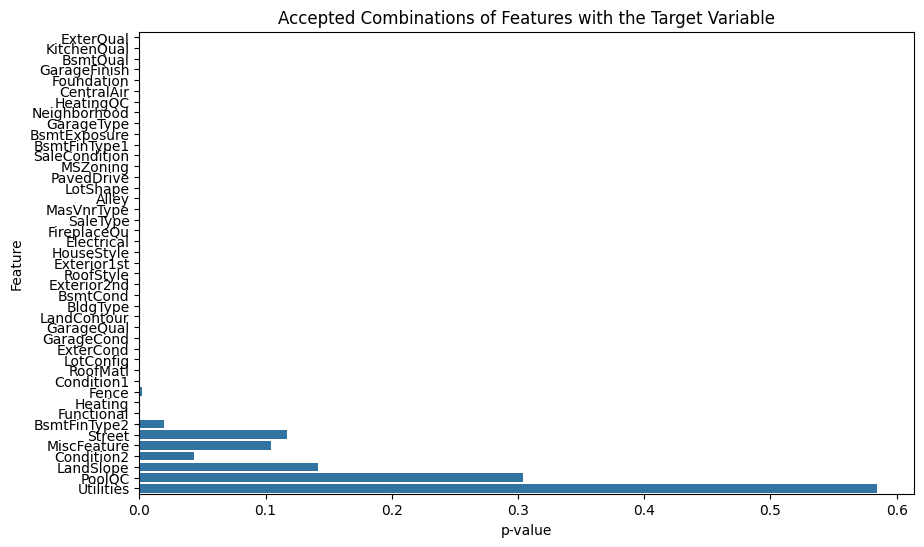

In [56]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def perform_anova(df):
    """
    Perform ANOVA tests on combinations of categorical features with the target variable.
    Compare F-values with critical values to make decisions.
    """
    
    # Step 1: Identify categorical columns (features)
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    # Step 2: Identify the target variable (assuming it's 'house_price')
    target_variable = 'SalePrice'
    
    print("Categorical columns:", categorical_columns)
    print("Target variable:", target_variable)
    print("\n")  # Print a blank line for readability
    
    # Step 3: Set significance level (commonly used value)
    alpha = 0.05
    
    # Step 4: Perform ANOVA for each categorical feature
    results = []  # List to store results
    accepted_combinations = []
    p_value_lists = []
    
    for column in categorical_columns:
        # Group the data by the categorical feature
        groups = df.groupby(column)[target_variable].apply(list)
        
        # Perform one-way ANOVA using scipy.stats.f_oneway
        f_value, p_value = stats.f_oneway(*groups)
        
        # Calculate degrees of freedom
        df_between = len(groups) - 1  # Degrees of freedom between groups
        df_within = sum(len(group) for group in groups) - len(groups)  # Degrees of freedom within groups
        
        # Calculate critical F-value
        critical_f = stats.f.ppf(1 - alpha, df_between, df_within)
        
        # Make decision based on comparison of F-value with critical F-value
        if f_value > critical_f:
            decision = "Reject H0"
        else:
            decision = "Fail to reject H0"

        if decision == "Reject H0":
            accepted_combinations.append(column)
            p_value_lists.append(p_value)
        
        # Store the results
        results.append({
            'Feature': column,
            'F-value': f_value,
            'Critical F-value': critical_f,
            'p-value': p_value,
            'Decision': decision
        })
        
        # Print the results
        print(f"ANOVA Results for {column}:")
        print(f"F-value: {f_value:.4f}")
        print(f"Critical F-value: {critical_f:.4f}")
        print(f"p-value: {p_value:.4f}")
        print(f"Decision: {decision}")
        
        # Interpret the results
        if decision == "Reject H0":
            print(f"{column} has a significant effect on {target_variable}")
        else:
            print(f"{column} does not have a significant effect on {target_variable}")
        
        print("\n")  # Print a blank line for readability
    
    # Step 5: Create a DataFrame from the results
    results_df = pd.DataFrame(results)
    
    # Step 6: Sort the results by F-value (descending order)
    results_df = results_df.sort_values('F-value', ascending=False)

    # print the accepted combinations
    print("Accepted Combinations of features with the target variable:")
    print("i.e. the features that have a significant effect on the target variable")
    print(accepted_combinations)

    # bar plot of accepted combinations and their p-values
    plt.figure(figsize=(10, 6))
    sns.barplot(x='p-value', y='Feature', data=results_df)
    plt.title('Accepted Combinations of Features with the Target Variable')
    plt.xlabel('p-value')
    plt.ylabel('Feature')
    plt.show()

# Call the function with our DataFrame
perform_anova(df)

# Embedded Methods for Feature Selection
---

Embedded methods integrate feature selection as part of the model training process. These methods perform feature selection and model fitting simultaneously, offering a balance between the computational efficiency of filter methods and the model-specific approach of wrapper methods.

## Key Characteristics of Embedded Methods

1. **Interaction with the Model**: Feature selection is performed as part of the model training process.
2. **Efficiency**: Generally more efficient than wrapper methods as they don't need to train multiple models.
3. **Model Specificity**: The selected features are specific to the model being used.

## Common Embedded Methods

### 1. Lasso  Regression

Lasso adds a penalty term to the loss function, which can force some feature coefficients to zero, effectively performing feature selection.

#### Mathematical Formulation:
$\min_{\beta} \frac{1}{n} \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij})^2 + \lambda \sum_{j=1}^p |\beta_j|$

Where:
- $\beta_j$ are the feature coefficients
- $\lambda$ is the regularization parameter
- The second term is the L1 penalty

#### Key Points:
- Lasso can completely eliminate less important features (coefficients become zero).
- The strength of regularization is controlled by $\lambda$.

### 2. Ridge Regression

Ridge regression uses L2 regularization, which doesn't typically set coefficients to exactly zero but can be used for feature importance ranking.

#### Mathematical Formulation:
$\min_{\beta} \frac{1}{n} \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij})^2 + \lambda \sum_{j=1}^p \beta_j^2$

#### Key Points:
- Ridge regression shrinks coefficients towards zero but rarely sets them exactly to zero.
- It's useful for dealing with multicollinearity.

### 3. Elastic Net

Elastic Net combines both L1 and L2 penalties of Lasso and Ridge regression.

#### Mathematical Formulation:
$\min_{\beta} \frac{1}{n} \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij})^2 + \lambda_1 \sum_{j=1}^p |\beta_j| + \lambda_2 \sum_{j=1}^p \beta_j^2$

#### Key Points:
- Combines the benefits of both Lasso and Ridge regression.
- Can select groups of correlated features.

### 4. Decision Tree-Based Methods

Decision trees have built-in feature selection. Methods like Random Forests and Gradient Boosting can provide feature importance scores.

#### Feature Importance in Random Forests:
- Based on the total decrease in node impurity (e.g., Gini impurity) averaged over all trees.
- Features used in earlier splits or more frequently are considered more important.

### 5. L1 Regularization in Neural Networks

Adding L1 regularization to the weights in neural networks can perform feature selection by driving some weights to zero.

## Advantages of Embedded Methods

1. **Computational Efficiency**: More efficient than wrapper methods.
2. **Interaction with the Model**: Takes into account the specific learning algorithm.
3. **Feature Dependencies**: Can capture feature dependencies.

## Limitations of Embedded Methods

1. **Model Specificity**: The selected features are specific to the particular model used.
2. **Interpretability**: Some methods (like in neural networks) may be less interpretable.
3. **Hyperparameter Sensitivity**: Performance can be sensitive to regularization parameters.


In [75]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.impute import SimpleImputer

"""
This script demonstrates various embedded methods for feature selection in machine learning,
focusing on numerical features only. It uses an existing DataFrame 'df' and applies three 
different embedded methods:
1. Lasso Regression
2. Ridge Regression
3. Elastic Net

For each method, it identifies the top 5 features to be eliminated based on their importance.
Finally, it provides a summary of the results and identifies consensus features for elimination.

NOTE: Here all categorical variables are removed from calculation. However, in actual practice, 
they would be encoded into numerical variables.
"""

def print_top_features_to_eliminate(feature_importance, feature_names, top_n=5):
    """
    Print the top N features to eliminate based on feature importance.

    Args:
    feature_importance (array): Array of feature importance scores.
    feature_names (list): List of feature names corresponding to the importance scores.
    top_n (int): Number of top features to print (default is 5).

    Returns:
    None: This function prints the results but does not return any value.
    """
    # Sort features by importance (ascending order)
    sorted_idx = np.argsort(feature_importance)
    print(f"Top {top_n} features to eliminate:")
    for i in range(top_n):
        print(f"  {feature_names[sorted_idx[i]]}: {feature_importance[sorted_idx[i]]:.4f}")
    print()  # Print a blank line for readability

# Assume 'df' is your existing DataFrame
# First, let's filter for numerical columns only
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target variable from the list of numerical columns if it's there
target_variable = 'SalePrice'  # Adjust this if your target variable has a different name
if target_variable in numerical_columns:
    numerical_columns.remove(target_variable)

# Remove columns with all NaN values
# loop through the columns and remove the ones where all values are NaN (isnull().all())
numerical_columns = [col for col in numerical_columns if not df[col].isnull().all()]

# Print information about selected features
print(f"Numerical features selected: {', '.join(numerical_columns)}")
print(f"Total number of numerical features: {len(numerical_columns)}")
print()

# Create a new DataFrame with only numerical features
X = df[numerical_columns]
y = df[target_variable]

# Handle NaN values using SimpleImputer
# This replaces NaN values with the mean of the column
# Imputer is used to replace NaN values with the mean of the column
# This is done to make educated guess of the missing value from the available data
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Get feature names for later use
feature_names = X.columns.tolist()

# Standardize the features
# This scales the features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

print("Embedded Methods for Feature Selection (Numerical Features Only)")
print("===============================================================")

# 1. Lasso Regression
print("Lasso Regression")
print("----------------")
# Lasso regression performs both feature selection and regularization
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso.fit(X_scaled, y)
lasso_importance = np.abs(lasso.coef_)  # Use absolute values of coefficients as importance
print_top_features_to_eliminate(lasso_importance, feature_names)

# 2. Ridge Regression
print("Ridge Regression")
print("----------------")
# Ridge regression performs regularization but not explicit feature selection
ridge = Ridge(alpha=0.1)  # alpha is the regularization strength
ridge.fit(X_scaled, y)
ridge_importance = np.abs(ridge.coef_)  # Use absolute values of coefficients as importance
print_top_features_to_eliminate(ridge_importance, feature_names)

# 3. Elastic Net
print("Elastic Net")
print("-----------")
# Elastic Net combines Lasso and Ridge regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # alpha is the regularization strength, l1_ratio balances Lasso vs. Ridge
elastic_net.fit(X_scaled, y)
elastic_net_importance = np.abs(elastic_net.coef_)  # Use absolute values of coefficients as importance
print_top_features_to_eliminate(elastic_net_importance, feature_names)

# Feature Elimination Summary
print("Feature Elimination Summary")
print("---------------------------")
methods = ['Lasso', 'Ridge', 'Elastic Net']
importances = [lasso_importance, ridge_importance, elastic_net_importance]

# Print the top 5 features to eliminate for each method
for method, importance in zip(methods, importances):
    eliminated_features = set(np.array(feature_names)[np.argsort(importance)[:5]])
    print(f"{method}: {', '.join(eliminated_features)}")

# Consensus Features to Eliminate
print("\nConsensus Features to Eliminate")
print("--------------------------------")
# Find features that all methods agree should be eliminated
all_eliminated = [set(np.array(feature_names)[np.argsort(imp)[:5]]) for imp in importances]
consensus = set.intersection(*all_eliminated)
print(f"Features suggested for elimination by all methods: {', '.join(consensus)}")

Numerical features selected: Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold
Total number of numerical features: 37

Embedded Methods for Feature Selection (Numerical Features Only)
Lasso Regression
----------------
Top 5 features to eliminate:
  MoSold: 122.1138
  OpenPorchSF: 192.6344
  MiscVal: 365.0966
  Id: 454.2142
  BsmtHalfBath: 478.5087

Ridge Regression
----------------
Top 5 features to eliminate:
  LowQualFinSF: 97.7832
  MoSold: 122.0318
  BsmtUnfSF: 174.2955
  OpenPorchSF: 192.4871
  BsmtFinSF2: 234.5849

Elastic Net
-----------
Top 5 features to eliminate:
  MoSold: 3.5328
  OpenPorchSF: 29.3030

In [ ]:
df.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'target'],
      dtype='object')

# ------ ADDITIONAL -------- 

# Tree-Based Feature Importance Methods
---

Tree-based methods, particularly Random Forests and Gradient Boosting Machines, offer powerful techniques for assessing feature importance. These methods are popular due to their ability to capture non-linear relationships and interactions between features.

## Overview

Tree-based importance methods leverage the structure of decision trees to quantify how much each feature contributes to the predictions. They are particularly useful because:

1. They can handle both numerical and categorical features.
2. They require minimal data preprocessing.
3. They can capture complex, non-linear relationships in the data.

## Main Approaches

### 1. Mean Decrease in Impurity (MDI)

Also known as Gini Importance or Mean Decrease in Gini.

#### How it works:
- For each feature, sum the weighted reduction in impurity (e.g., Gini impurity for classification, MSE for regression) for all nodes where the feature is used.
- Normalize the sum to get relative importance scores.

#### Pros:
- Fast to compute
- Stable across multiple runs

#### Cons:
- Can be biased towards high cardinality features
- Doesn't account for feature correlations

### 2. Mean Decrease in Accuracy (MDA)

Also known as Permutation Importance.

#### How it works:
- Randomly permute the values of a feature and measure the decrease in model accuracy.
- Features that cause a larger decrease in accuracy are deemed more important.

#### Pros:
- Less biased than MDI
- Can be used with any model, not just trees

#### Cons:
- Computationally more expensive
- Can be unstable for small datasets

### 3. SHAP (SHapley Additive exPlanations) Values

A game-theoretic approach to feature importance.

#### How it works:
- Calculates the average marginal contribution of a feature across all possible feature combinations.

#### Pros:
- Provides both global and local feature importance
- Theoretically sound with strong mathematical backing

#### Cons:
- Computationally expensive, especially for large datasets


## Interpreting the Results

- Features with higher importance scores contribute more to the model's predictions.
- The sum of all feature importances equals 1 (or 100%).
- Be cautious of interpreting absolute importance values; relative rankings are often more reliable.

## Best Practices

1. **Use multiple methods**: Compare results from different importance methods for robustness.
2. **Cross-validation**: Use cross-validation to ensure stability of importance scores.
3. **Feature correlation**: Be aware that correlated features might share importance.
4. **Domain knowledge**: Always interpret results in the context of domain expertise.

## Limitations

- Tree-based methods might not capture linear relationships as effectively as linear models.
- They can be biased towards continuous features or high-cardinality categorical features.
- The importance scores don't indicate the direction of the relationship (positive or negative).


Tree-based feature importance methods offer valuable insights into which features are most predictive in your model. They are particularly useful in the exploratory phase of a project and can guide feature selection and engineering efforts. However, they should be used in conjunction with other techniques and domain knowledge for comprehensive feature analysis.

Data preparation complete.
Training set shape: (1168, 37)
Testing set shape: (292, 37)
Features used: Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold

Random Forest model training complete.

Mean Decrease in Impurity (MDI) Feature Importance:
OverallQual: 0.5632
GrLivArea: 0.1244
TotalBsmtSF: 0.0373
2ndFlrSF: 0.0364
BsmtFinSF1: 0.0328
1stFlrSF: 0.0298
LotArea: 0.0201
GarageArea: 0.0180
YearBuilt: 0.0169
GarageCars: 0.0135
LotFrontage: 0.0124
GarageYrBlt: 0.0103
YearRemodAdd: 0.0099
TotRmsAbvGrd: 0.0080
OpenPorchSF: 0.0076
FullBath: 0.0062
BsmtUnfSF: 0.0060
WoodDeckSF: 0.0059
Id: 0.0059
OverallCond: 0.0053
MasV

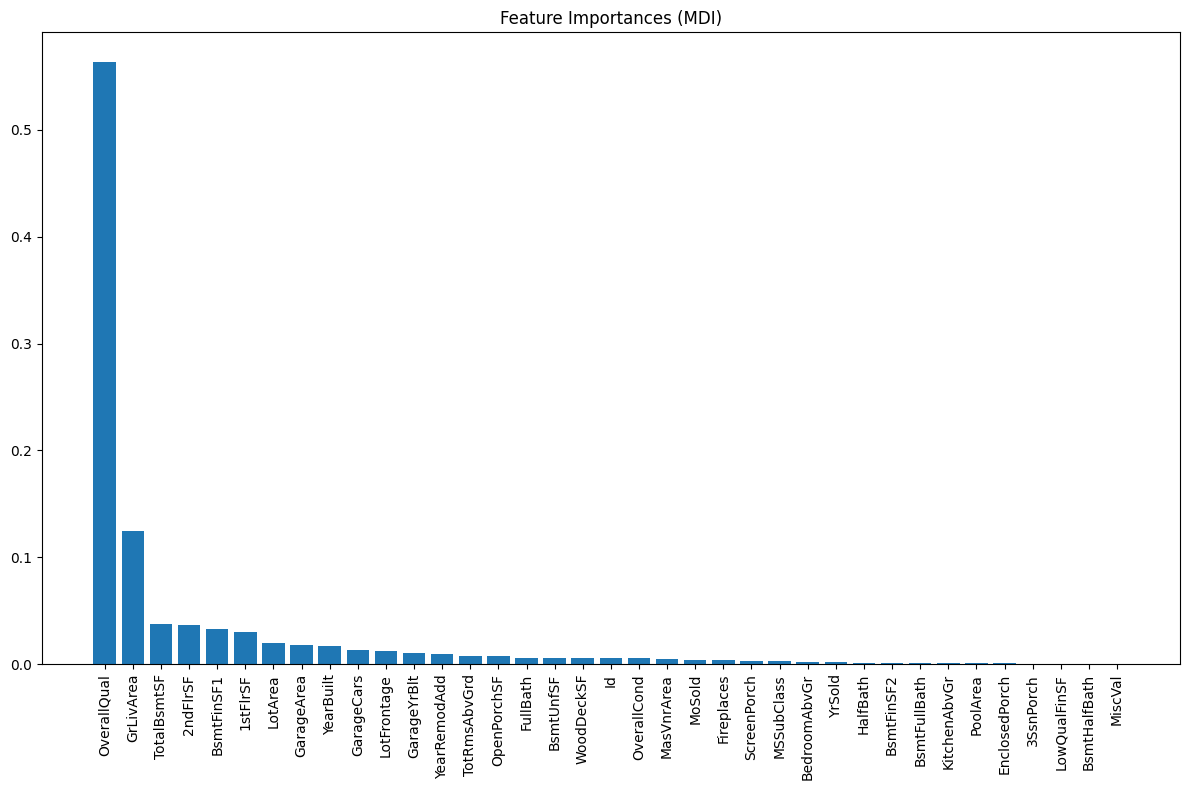


Permutation Importance:
OverallQual: 0.5168 +/- 0.0325
GrLivArea: 0.1227 +/- 0.0073
2ndFlrSF: 0.0343 +/- 0.0039
TotalBsmtSF: 0.0307 +/- 0.0038
1stFlrSF: 0.0212 +/- 0.0040
BsmtFinSF1: 0.0187 +/- 0.0036
GarageCars: 0.0161 +/- 0.0016
LotArea: 0.0113 +/- 0.0025
YearBuilt: 0.0103 +/- 0.0013
GarageArea: 0.0070 +/- 0.0015
YearRemodAdd: 0.0064 +/- 0.0012
GarageYrBlt: 0.0056 +/- 0.0012
TotRmsAbvGrd: 0.0053 +/- 0.0011
OverallCond: 0.0048 +/- 0.0007
MasVnrArea: 0.0024 +/- 0.0004
FullBath: 0.0022 +/- 0.0006
LotFrontage: 0.0022 +/- 0.0015
Fireplaces: 0.0019 +/- 0.0005
MoSold: 0.0012 +/- 0.0006
MSSubClass: 0.0010 +/- 0.0005
BedroomAbvGr: 0.0007 +/- 0.0002
BsmtUnfSF: 0.0006 +/- 0.0007
BsmtFullBath: 0.0003 +/- 0.0003
KitchenAbvGr: 0.0003 +/- 0.0001
YrSold: 0.0003 +/- 0.0002
OpenPorchSF: 0.0002 +/- 0.0011
HalfBath: 0.0001 +/- 0.0002
BsmtFinSF2: 0.0000 +/- 0.0003
BsmtHalfBath: 0.0000 +/- 0.0000
MiscVal: 0.0000 +/- 0.0000
LowQualFinSF: 0.0000 +/- 0.0000
PoolArea: -0.0000 +/- 0.0000
ScreenPorch: -0.0001 

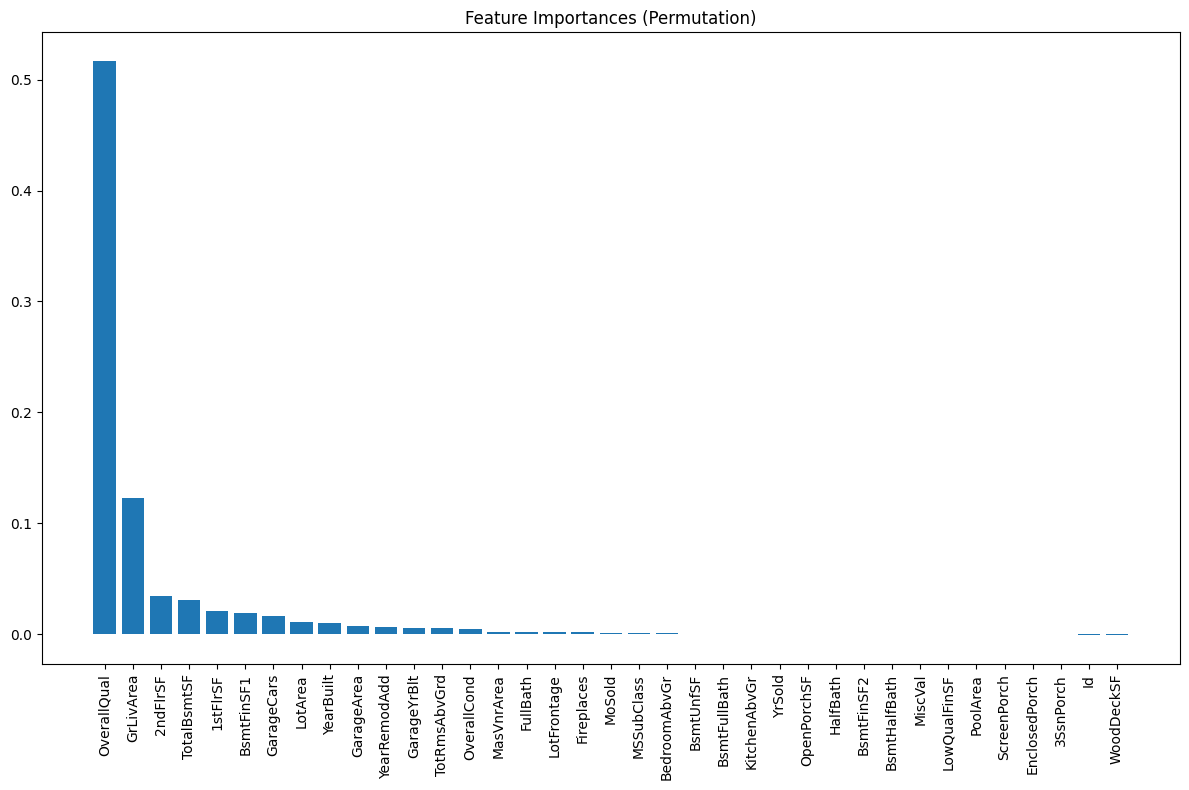

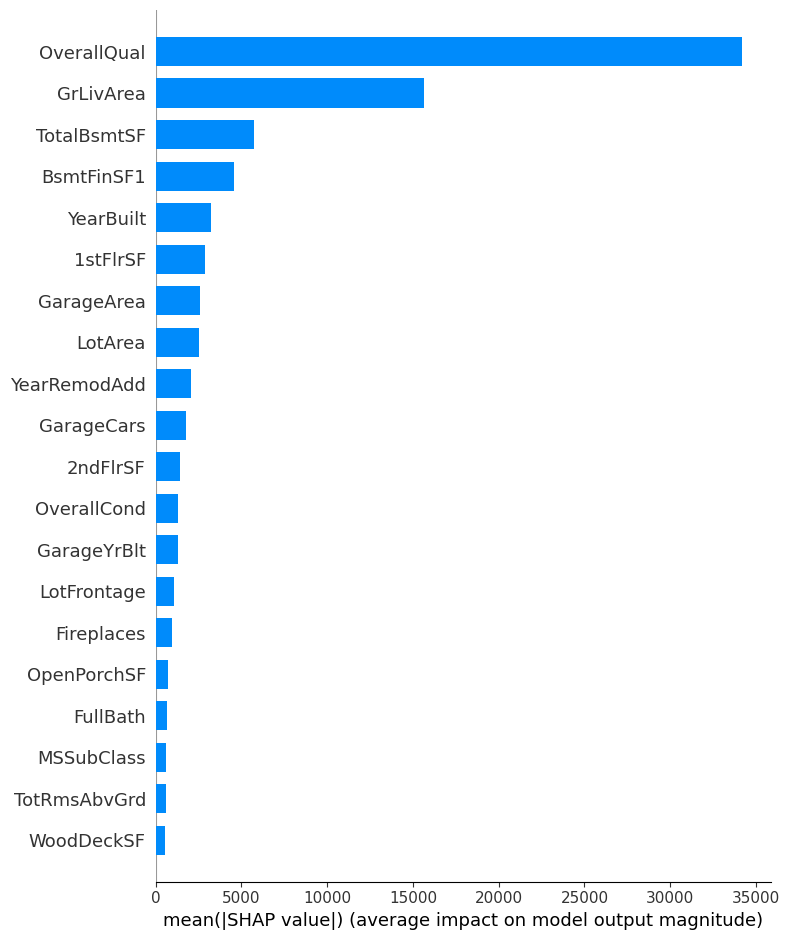


SHAP Analysis complete. Please check the generated plots.

Top 5 features based on MDI: ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1']
Top 5 features based on Permutation Importance: ['OverallQual', 'GrLivArea', '2ndFlrSF', 'TotalBsmtSF', '1stFlrSF']

Script execution complete.


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import shap

"""
This script demonstrates various tree-based feature importance methods using your provided DataFrame 'df':
1. Mean Decrease in Impurity (MDI)
2. Permutation Importance
3. SHAP (SHapley Additive exPlanations) Values

We'll use a Random Forest model as our base estimator and apply these methods
to understand feature importance in a regression task.
"""

# Step 1: Data Preparation
# ------------------------
# We'll use the DataFrame 'df' that you've provided

# Assuming 'SalePrice' is your target variable. Adjust if it's different.
target_variable = 'SalePrice'

# Separate features and target
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Get feature names
feature_names = X.columns.tolist()

# Handle non-numeric columns
# For simplicity, we'll drop non-numeric columns. In a real scenario, you might want to encode them.
X = X.select_dtypes(include=[np.number])
feature_names = X.columns.tolist()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preparation complete.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Features used: {', '.join(feature_names)}")

# Step 2: Model Training
# ----------------------
# We'll use a Random Forest Regressor as our base model

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("\nRandom Forest model training complete.")

# Step 3: Mean Decrease in Impurity (MDI)
# ---------------------------------------
# This is the default feature importance method in scikit-learn's Random Forest

# Get feature importances
mdi_importances = rf_model.feature_importances_

# Sort features by importance
mdi_indices = np.argsort(mdi_importances)[::-1]

print("\nMean Decrease in Impurity (MDI) Feature Importance:")
for f, idx in enumerate(mdi_indices):
    print(f"{feature_names[idx]}: {mdi_importances[idx]:.4f}")

# Visualize MDI importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances (MDI)")
plt.bar(range(len(feature_names)), mdi_importances[mdi_indices])
plt.xticks(range(len(feature_names)), [feature_names[i] for i in mdi_indices], rotation=90)
plt.tight_layout()
plt.show()

# Step 4: Permutation Importance
# ------------------------------
# This method measures the decrease in model performance when a feature is randomly shuffled

# Calculate permutation importances
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

# Sort features by mean importance
perm_indices = perm_importance.importances_mean.argsort()[::-1]

print("\nPermutation Importance:")
for f, idx in enumerate(perm_indices):
    print(f"{feature_names[idx]}: {perm_importance.importances_mean[idx]:.4f} +/- {perm_importance.importances_std[idx]:.4f}")

# Visualize permutation importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances (Permutation)")
plt.bar(range(len(feature_names)), perm_importance.importances_mean[perm_indices])
plt.xticks(range(len(feature_names)), [feature_names[i] for i in perm_indices], rotation=90)
plt.tight_layout()
plt.show()

# Step 5: SHAP Values
# -------------------
# SHAP (SHapley Additive exPlanations) provides a unified measure of feature importance

# Create a SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar")

print("\nSHAP Analysis complete. Please check the generated plots.")

"""
Interpretation and Comparison:
------------------------------
1. MDI (Mean Decrease in Impurity):
   - Fast to compute and comes built-in with tree-based models.
   - Can be biased towards high cardinality features.
   - Doesn't account for feature correlations.

2. Permutation Importance:
   - More computationally expensive but often more reliable.
   - Can be used with any model, not just trees.
   - Accounts for the model's predictive performance.

3. SHAP Values:
   - Provides both global and local feature importance.
   - Computationally expensive but offers detailed insights.
   - Can capture complex feature interactions.

Compare the results from these three methods. Features that consistently rank
high across methods are likely to be truly important. Discrepancies between
methods can reveal interesting aspects of your data and model.

Remember:
- Feature importance doesn't imply causality.
- The direction of influence (positive/negative) isn't captured by importance alone.
- Always interpret results in the context of your domain knowledge.
"""

# Optional: Feature Selection based on importance
# -----------------------------------------------
# You can use these importance scores to select top N features

def select_top_features(importance_scores, feature_names, top_n=5):
    """
    Select the top N features based on importance scores.
    
    Args:
    importance_scores (array): Array of feature importance scores.
    feature_names (list): List of feature names.
    top_n (int): Number of top features to select.
    
    Returns:
    list: Names of the top N features.
    """
    indices = np.argsort(importance_scores)[::-1]
    return [feature_names[i] for i in indices[:top_n]]

# Example: Select top 5 features based on MDI
top_features_mdi = select_top_features(mdi_importances, feature_names)
print(f"\nTop 5 features based on MDI: {top_features_mdi}")

# Example: Select top 5 features based on Permutation Importance
top_features_perm = select_top_features(perm_importance.importances_mean, feature_names)
print(f"Top 5 features based on Permutation Importance: {top_features_perm}")

print("\nScript execution complete.")